# Breast Cancer Detection
### http://imreza.ir/?p=2606

First of all, we should add necessary libraries to our code.
We will use following packages.

–NumPy: We use this package for its computational power

–Pandas: To handle dataset

–Matplotlib: Plotting things

–Sklearn: To use machine learning packages 

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm


### Why we used numpy as np ? or pandas as pd and matplotlib.pyplot as plt ??
Its not necessary to use these packages like this but this is an standard between programmers around the world to import like this. It will give readability to the codes. 

From line 5 to 10 we import the functions and methods we need from Sklearn.
You will learn more about these functions and their usage.

OK. We gathered needed packages. Then we need to import the dataset to our code.
I used “Breast Cancer Wisconsin (Diagnostic)” Dataset.
Go to Data Folder and download breast-cancer-wisconsin.data and breast-cancer-wisconsin.names.

In the .names file, we have information about the data. the owners of dataset put this information to help you with analyzing.
the important thing that you should always pay attention to it is FEATURES. what’s the features (attributes) of this dataset and number of them? these information is available in file: 10 plus the class attribute.
What it means “plus the class attribute”? class attribute shows that patient has either malignant (if class=4 ) or benign (if class=2) cancer.
KEY: If we had raw data like raw EEG data, we would find features before the learning part.
Also in this dataset, they wrote that number of instances is 699. So we have 699 rows, when we import data in our environment.
699 X 11. Why 11 columns? first one includes ID.

In [2]:
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
       'marginal_adhesion','signle_epithelial_size','bra_nuclei',
       'bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv('breast-cancer-wisconsin.data',names=names)

names variable contains 11 label for columns.
with pd.read_csv we can read .data files easily. we also added names to it to distinguish columns quickly. ( pd refers to Pandas, remember?)

To check the size of data we use following lines:

In [3]:
print(df.axes)
print (df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bra_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)


df.axes shows number of rows and name of columns

df.shape shows number of rows and number of columns

To access a row we use this code:

In [4]:
print(df.loc[0])
print(df.describe())

id                        1000025
clump_thickness                 5
uniform_cell_size               1
uniform_cell_shape              1
marginal_adhesion               1
signle_epithelial_size          2
bra_nuclei                      1
bland_chromatin                 3
normal_nucleoli                 1
mitoses                         1
class                           2
Name: 0, dtype: object
                 id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.0

df.loc[0] to df.loc[698] shows all the information in each row.

df.describe() calculates statistical variables like mean and standard deviation for each column.

To visualize data we can use hist() method:

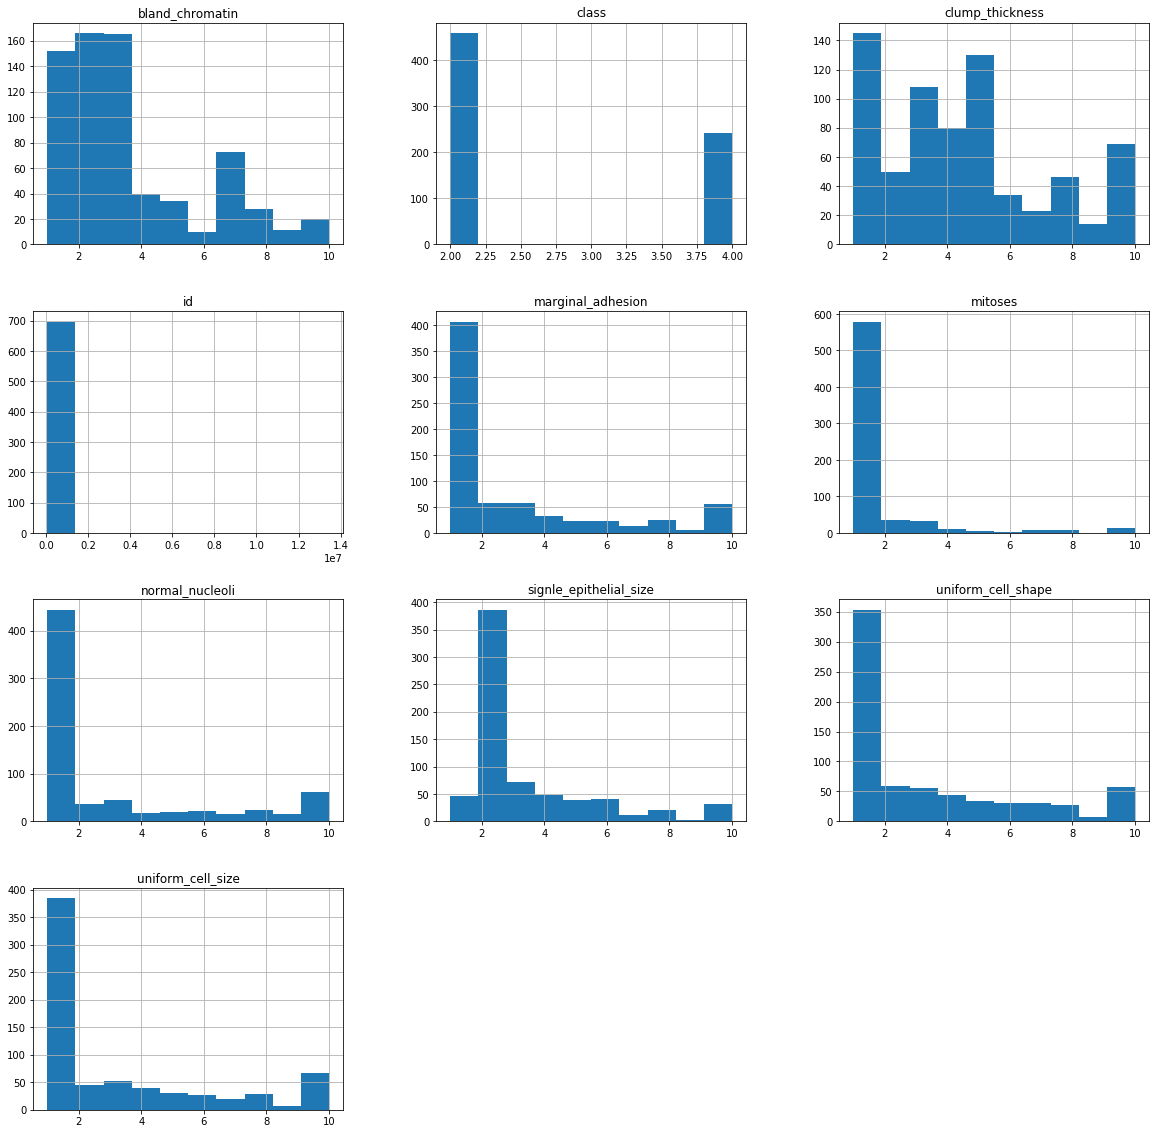

In [5]:
df.hist(figsize=(20,20))
plt.show()

As mentioned in the .names file, each element in columns and rows have value between 0 to 10.

Also, we can use to illustrate data:

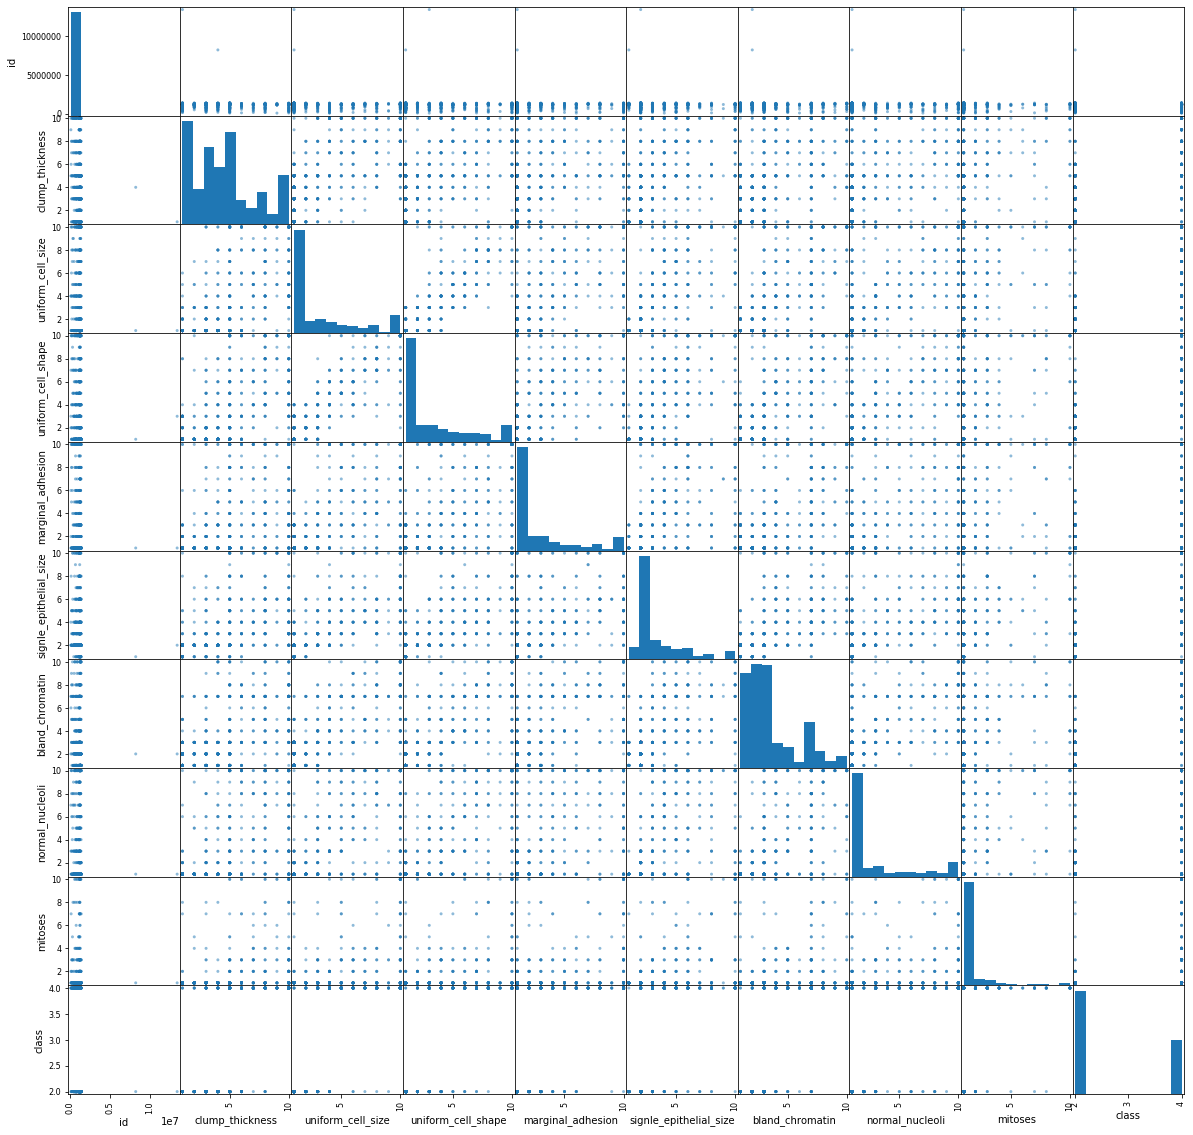

In [6]:
scatter_matrix(df,figsize=(20,20))
plt.show()

OK, now we need to create train and test data.

To access a column with its name we can use df[‘class’]

now we have class column as output. This is our Y. outputs which we give to our learning core.

What are the inputs? other 10 columns. We can easily delete class column and give the result as input to our leaning system.

In [7]:
df.replace('?',-99999,inplace=True)

X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

now we created input and output. we need to split the data like 80% of all data is dedicated to training and 20% of them is for testing. we show this ratio with test_size=0.2 in our code.

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

#### To create an SVM classifier:

In [9]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6214285714285714
